In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../pyLDLE2/')

In [2]:
import numpy as np
from pyLDLE2 import util_, visualize_, datasets
from scipy.sparse import coo_matrix
from scipy import optimize
from scipy.special import erf, erfinv
from matplotlib import pyplot as plt
from scipy.stats import chi2

import bx_util

matplotlib.get_backend() =  module://matplotlib_inline.backend_inline


In [3]:
vis = visualize_.Visualize()

In [4]:
X, labelsMat, ddX = datasets.Datasets().circular_disk_uniform(n=10000, noise=0.1, noise_type='uniform')

X.shape =  (7837, 3)


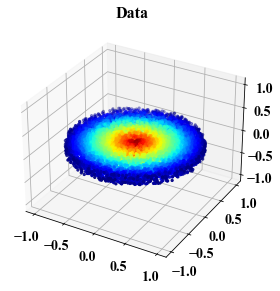

In [5]:
vis.data(X, ddX)

In [18]:
opts = bx_util.default_opts
opts['k_nn'] = 256
opts['k_tune'] = 256
opts['ds'] = True
opts['local_pca'] = True
s_list = (np.arange(1,21)/40).tolist()
bx_ds_list = []
bx_init_ds_list = []
K_ds_list = []
D_ds_list = []
for i in range(len(s_list)):
    s = s_list[i]
    print('s:', s, flush=True)
    opts['s'] = s
    if i == 0:
        bx_ds, bx_init_ds, K_ds, D_ds = bx_util.estimate_bx(X, opts=opts, ret_K_D = True)
    else:
        opts['K'] = K_ds
        opts['D'] = D_ds
        bx_ds, bx_init_ds, _, _ = bx_util.estimate_bx(X, opts=opts, ret_K_D = True)
    bx_ds_list.append(bx_ds)
    bx_init_ds_list.append(bx_init_ds)

s: 0.025
h: 0.08104316744131629
s: 0.05
h: 0.08104316744131629
s: 0.075
h: 0.08104316744131629
s: 0.1
h: 0.08104316744131629
s: 0.125
h: 0.08104316744131629
s: 0.15
h: 0.08104316744131629
s: 0.175
h: 0.08104316744131629
s: 0.2
h: 0.08104316744131629
s: 0.225
h: 0.08104316744131629
s: 0.25
h: 0.08104316744131629
s: 0.275
h: 0.08104316744131629
s: 0.3
h: 0.08104316744131629
s: 0.325
h: 0.08104316744131629
s: 0.35
h: 0.08104316744131629
s: 0.375
h: 0.08104316744131629
s: 0.4
h: 0.08104316744131629
s: 0.425
h: 0.08104316744131629
s: 0.45
h: 0.08104316744131629
s: 0.475
h: 0.08104316744131629
s: 0.5
h: 0.08104316744131629


In [19]:
opts = bx_util.default_opts
opts['K'] = None
opts['k_nn'] = 256
opts['k_tune'] = 256
opts['ds'] = False
opts['local_pca'] = True
bx, bx_init = bx_util.estimate_bx(X, opts=opts)

h: 0.08104316744131629


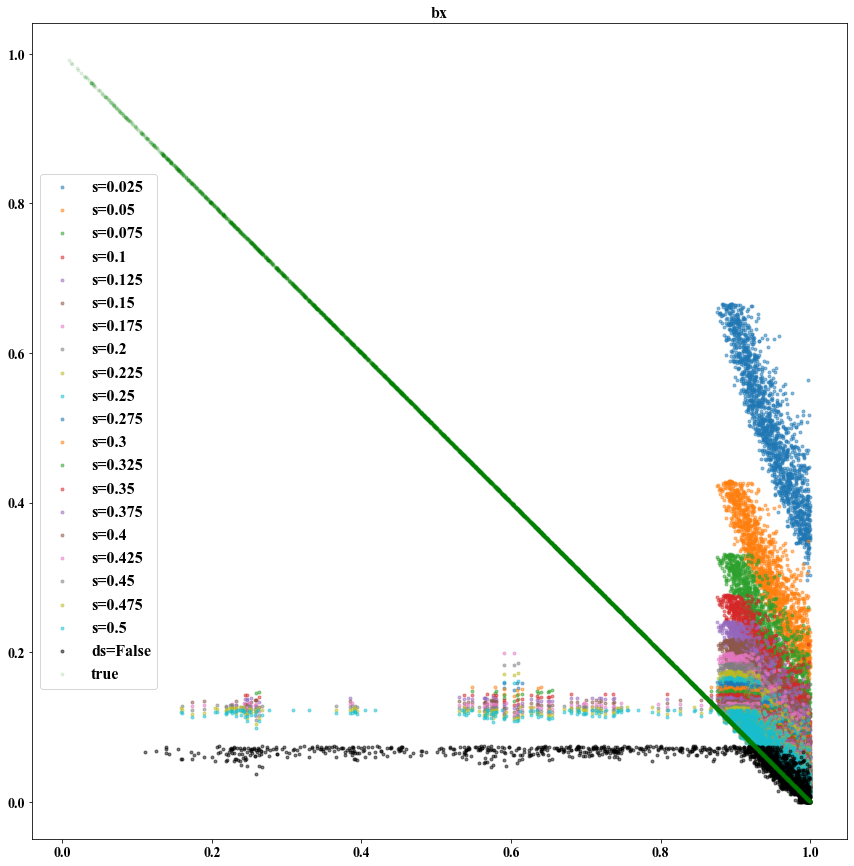

In [42]:
plt.figure(figsize=(15,15))
prctile = 20
for i in range(0,20):
    thresh = np.percentile(bx_ds_list[i], prctile)
    mask = bx_ds_list[i] < thresh
    plt.scatter(np.linalg.norm(X[mask,:2], axis=1), bx_ds_list[i][mask],
                label='s='+str(s_list[i]), alpha=0.5)
thresh = np.percentile(bx, prctile)
mask = bx < thresh
plt.scatter(np.linalg.norm(X[mask,:2], axis=1), bx[mask], color='k', label='ds=False', alpha=0.5)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), ddX, color='g', label='true', alpha=0.1)
plt.title('bx')
plt.axis('image')
plt.legend()

In [34]:
srcc_stat = []
srcc_p = []
prctile = 20
for i in range(len(s_list)):
    res = bx_util.compute_SRCC(ddX, bx_ds_list[i], prctile=prctile)
    srcc_stat.append(res.correlation)
    srcc_p.append(res.pvalue)

In [35]:
res = bx_util.compute_SRCC(ddX, bx, prctile=prctile)
srcc_stat.append(res.correlation)
srcc_p.append(res.pvalue)

Text(0, 0.5, 'spearman rank corr')

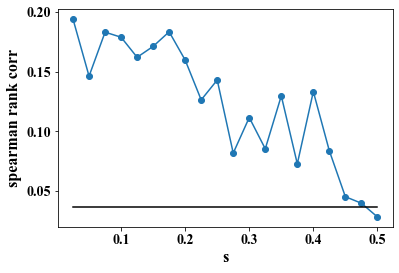

In [43]:
plt.figure()
plt.plot(s_list, srcc_stat[:-1], '-o')
plt.plot([s_list[0], s_list[-1]], [srcc_stat[-1],srcc_stat[-1]], 'k')
plt.xlabel('s')
plt.ylabel('spearman rank corr')

Text(0, 0.5, 'spearman rank p-value')

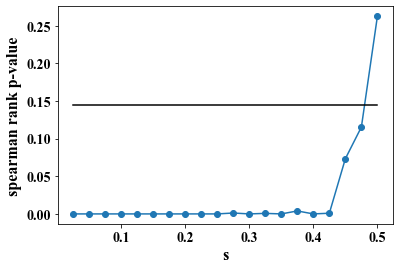

In [44]:
plt.figure()
plt.plot(s_list, srcc_p[:-1], '-o')
plt.plot([s_list[0], s_list[-1]], [srcc_p[-1],srcc_p[-1]], 'k')
plt.xlabel('s')
plt.ylabel('spearman rank p-value')